In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("dataset/Telco_customer_churn.xlsx")

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.shape

(7043, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Total Charges'].dtype

dtype('O')

In [13]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [14]:
df['Total Charges'].dtype

dtype('float64')

In [15]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [16]:
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

C:\Users\shere\AppData\Local\Temp\ipykernel_5588\3101923061.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)


In [17]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [19]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [20]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [21]:
churn_rate = df['Churn Label'].value_counts(normalize=True) * 100
churn_rate


Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

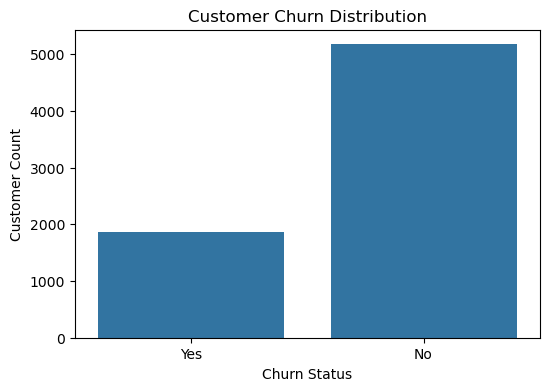

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn Label', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Customer Count")
plt.show()

In [25]:
pd.crosstab(df['Contract'], df['Churn Label'], normalize='index') * 100

Churn Label,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


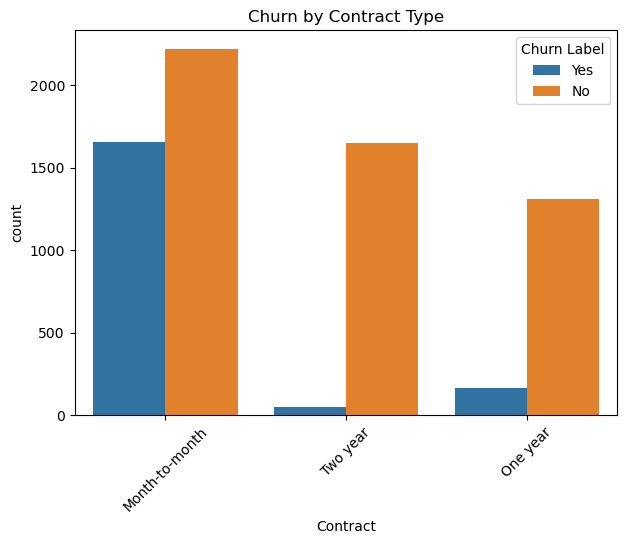

In [50]:
plt.figure(figsize=(7,5))
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

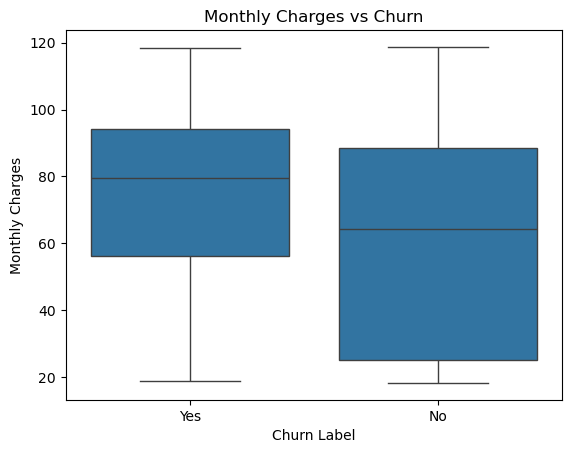

In [51]:
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

In [29]:
pd.crosstab(df['Internet Service'], df['Churn Label'], normalize='index') * 100

Churn Label,No,Yes
Internet Service,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


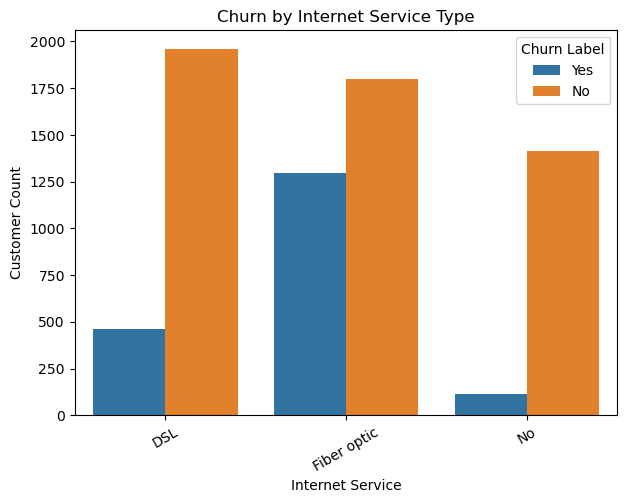

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(x='Internet Service', hue='Churn Label', data=df)
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Customer Count")
plt.xticks(rotation=30)
plt.show()

In [31]:
df_model = df.drop(columns=[
    'CustomerID','Country','State','City','Zip Code',
    'Lat Long','Latitude','Longitude','Churn Reason'
])

In [32]:
X = df_model.drop('Churn Value', axis=1)
y = df_model['Churn Value']

In [33]:
X = pd.get_dummies(X, drop_first=True)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
X_train.shape
X_test.shape

(1409, 34)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=3000)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 1.0


C:\Users\shere\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


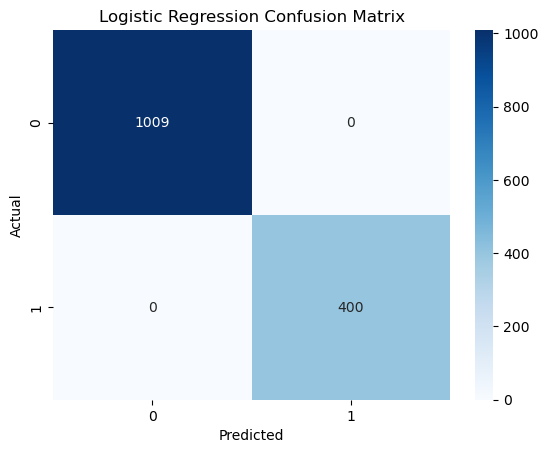

In [39]:
cm = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [41]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0


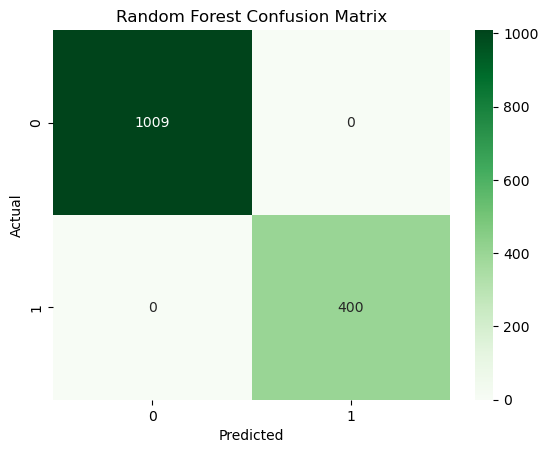

In [42]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(10)

feature_importance

,Feature,Importance
33,Churn Label_Yes,0.566637
4,Churn Score,0.222729
1,Tenure Months,0.041861
3,Total Charges,0.026707
13,Internet Service_Fiber optic,0.021431
2,Monthly Charges,0.015370
28,Contract_Two year,0.014370
31,Payment Method_Electronic check,0.014126
5,CLTV,0.010683
9,Dependents_Yes,0.009298


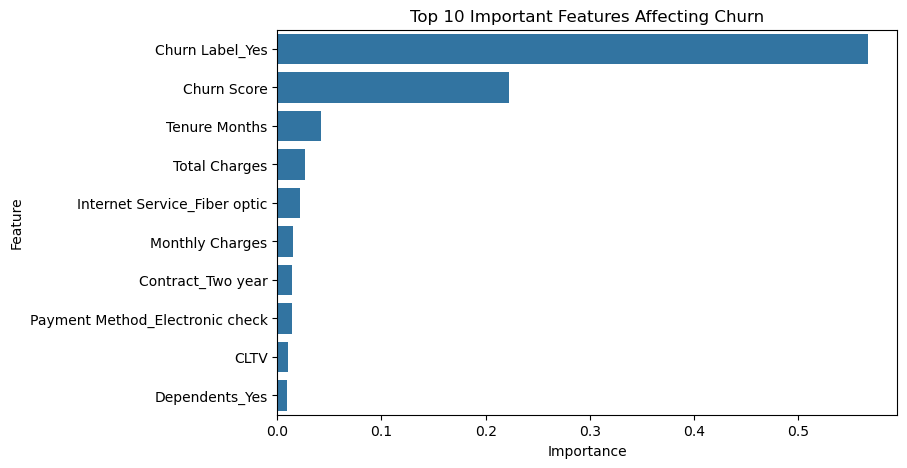

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("Top 10 Important Features Affecting Churn")
plt.show()

In [45]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ]
})

comparison

,Model,Accuracy
0,Logistic Regression,1.0
1,Random Forest,1.0


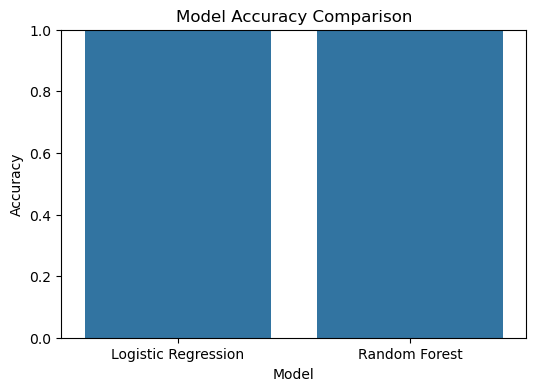

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=comparison)
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()